# 1. Loading dataset

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('un-general-debates-blueprint.csv.gz')

In [4]:
df.sample(3)

,session,year,country,country_name,speaker,position,text
6072,63,2008,MDG,Madagascar,Marc Ravalomanana,President,"Eight years ago in this very Hall, we, the lea..."
7473,70,2015,SUR,Suriname,Ms. Niermala Badrising,Minister for Foreign Affairs,On behalf of President Desiré Delano Bouterse ...
736,31,1976,GRC,Greece,Mr. Bitsios,NaN,First of all I should like to offer my congrat...


In [5]:
df.shape

(7507, 7)

In [6]:
df[['year','country']].drop_duplicates().count() #check pkey ว่าคือตัวไหน

year       7507
country    7507
dtype: int64

# 2. DataFrame summary statistics

In [7]:
df['length'] = df['text'].str.len()
df.head()
#นับ strings 'text' เก็บไว้ใน length

,session,year,country,country_name,speaker,position,text,length
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...,51419
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...,29286
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...,31839
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...,26616
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ...",25911


In [8]:
df.columns

Index(['session', 'year', 'country', 'country_name', 'speaker', 'position',
       'text', 'length'],
      dtype='object')

In [9]:
df.dtypes

session          int64
year             int64
country         object
country_name    object
speaker         object
position        object
text            object
length           int64
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   session       7507 non-null   int64 
 1   year          7507 non-null   int64 
 2   country       7507 non-null   object
 3   country_name  7507 non-null   object
 4   speaker       7480 non-null   object
 5   position      4502 non-null   object
 6   text          7507 non-null   object
 7   length        7507 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 469.3+ KB


In [11]:
df.describe().T
#น่าจะเป็น transpost

,count,mean,std,min,25%,50%,75%,max
session,7507.0,49.610763,12.892155,25.0,39.0,51.0,61.0,70.0
year,7507.0,1994.610763,12.892155,1970.0,1984.0,1996.0,2006.0,2015.0
length,7507.0,17967.281604,7860.038463,2362.0,12077.0,16424.0,22479.5,72041.0


In [12]:
df[['country','speaker']].describe(include='O').T #ใครมาพูดบ่อยสุด ประเทศอะไร

,count,unique,top,freq
country,7507,199,ALB,46
speaker,7480,5428,Seyoum Mesfin,12


# 3. Checking for missing data

## Checking

In [13]:
df.isna().sum() #ดูmissing data

session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
length             0
dtype: int64

## Fixing

In [14]:
df['speaker'].fillna('unknown',inplace=True) #ใส่ unknown แทนที่

In [15]:
df.isna().sum()

session            0
year               0
country            0
country_name       0
speaker            0
position        3005
text               0
length             0
dtype: int64

## More problems

In [16]:
df[df['speaker'].str.contains('Bush')]['speaker'].value_counts()
# เป็นการกำหนดให้ออกมาแค่ข้อมูลของ column speaker ที่ชื่อ bush ซึ่งไม่รู้ว่าแต่ละ bush ที่ออกมาอาจเป็นคนเดียวกันแต่ text อาจจะเขียนมาต่างกันก็ได้ 
# จึงต้องเอาข้อมูลไปลดความซ้ำซ้อนด้วยการทำ integration

George W. Bush        4
Mr. George W. Bush    2
Bush                  1
George Bush           1
Mr. George W Bush     1
Name: speaker, dtype: int64

# 4. Plotting distributions

## Length distribution

<AxesSubplot:>

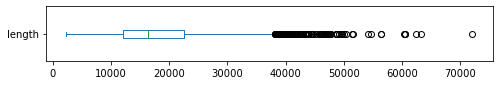

In [17]:
df['length'].plot(kind='box', vert=False, figsize=(8, 1))

<AxesSubplot:ylabel='Frequency'>

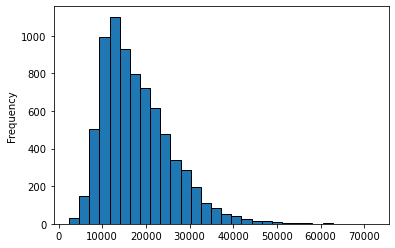

In [18]:
df['length'].plot(kind='hist', bins=30, figsize=(6, 4), edgecolor='k')

# 5. Distributions across categories

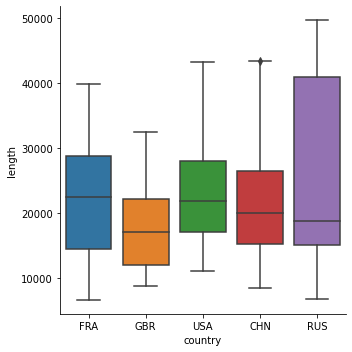

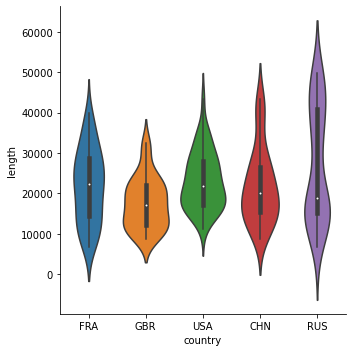

In [19]:
import seaborn as sns

where = df['country'].isin(['USA','FRA','GBR','CHN','RUS'])
#isin จะช่วยกรองแถวที่มีข้อมูลตรงกับที่เรากำหนดในcolumn ที่เราต้องการ
sns.catplot(data=df[where], x='country', y='length', kind='box')
sns.catplot(data=df[where], x='country', y='length', kind='violin')
#จุดขาวตรงกลางคือ median

# 6. Development over time

<AxesSubplot:title={'center':'Number of Countries'}, xlabel='year'>

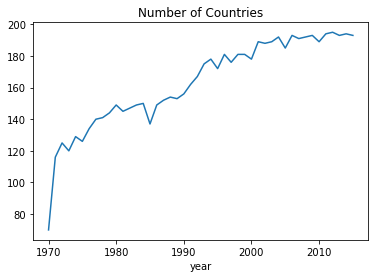

In [21]:
df.groupby('year').size().plot(title='Number of Countries')

<AxesSubplot:title={'center':'Avg. Speech Length'}, xlabel='year'>

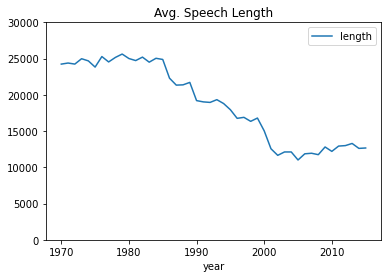

In [24]:
df.groupby('year').agg({'length':'mean'})\
        .plot(title='Avg. Speech Length', ylim=(0,30000))
# \ ใช้ในการขึ้นบรรทัดใหม่ดดยที่ข้อมูลยังจำเป็นต้องเขียนต่อกันอยู่

# 7. Simple Text Processing
ขั้นตอนการประมวลผล text
1. Case folding
2. Tokenization
3. Stop word removal

## 7.1 Case Folding
ปรับแต่ละ case โดย normalize ให้ตรงกัน

In [104]:
str.lower('Hello World!')

'hello world!'

## 7.2 Tokenization
แบ่งให้เป็นแต่ละ Token \
Tokenize โดย regular expression (re.) : เอาไว้สำหรับการแปลง pattern \
findall เป็นการเข้าไป findall ตาม pattern ใน text

In [166]:
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)
# r'[\w-] : whitespace(ช่องว่าง) 
# * คือมีกี่อันก็ได้ 
# p{L} : text ใดๆ


In [167]:
text = "Let's defeat SARS-Cov-2 together in 2021!"
tokens = tokenize(text)
print("|".join(tokens))
#โดยจะดึงออกมาเป็น list ของตัวอักษร ไม่นับตัวเลข 2021 จึงไม่ออกมาด้วย

Let|s|defeat|SARS-Cov-2|together|in


## 7.3 Stopword Removal
เอาไว้เป็นการ check word in token ว่าไม่มี stopword ปะปนอยู่ด้วย \
stopword : คำที่เป็นคำเชื่อม หรือไม่มีความหมาย ไม่ใช่คำ keyword \
โดย Stopword Removal จะเอาคำที่อยู่ใน Stopword ทิ้งไป

In [107]:
!pip install nltk

In [108]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jirap\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [109]:
stopwords = set(nltk.corpus.stopwords.words('english'))
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [110]:
type(stopwords)

set

In [111]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]
# ถ้าไม่ใช่คำใน Stopword ก็ให้ return ค่าออกมา

In [112]:
remove_stop(tokens)
# return in list

['Let', 'defeat', 'SARS-Cov-2', 'together']

## 7.4 Processing a pipeline

In [168]:
pipeline = [str.lower, tokenize, remove_stop]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [169]:
type(text)

str

In [170]:
prepare(text, pipeline)

['let', 'defeat', 'sars-cov-2', 'together']

## 7.5 Applying pipeline

In [171]:
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline) 
#จะกำหนดพารามิเตอร์ฟังชั่นได้ด้วย
df.sample(3)
#df.head()

,session,year,country,country_name,speaker,position,text,length,tokens
2251,41,1986,TCD,Chad,Mr. LASSOU,NaN,"First, Sir, I wish, like previous speakers, t...",13335,"[first, sir, wish, like, previous, speakers, e..."
4289,54,1999,BDI,Burundi,Severin Ntahomvukiye,Minister for Foreign Affairs,Allow me first of all to associate myself with...,16212,"[allow, first, associate, previous, speakers, ..."
5820,62,2007,DOM,Dominican Republic,"Leonel Fernández Reyna,",President,On behalf of the Government and the people of ...,7662,"[behalf, government, people, dominican, republ..."


## 7.6 Counting number of tokens (words)

In [173]:
df['num_tokens'] = df['tokens'].map(len)

In [174]:
df.head()

,session,year,country,country_name,speaker,position,text,length,tokens,num_tokens
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...,51419,"[may, first, convey, president, congratulation...",4092
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...,29286,"[fortunate, coincidence, precisely, time, unit...",2341
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...,31839,"[pleasure, extend, mr, president, warmest, con...",2575
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...,26616,"[may, begin, expressing, ambassador, hambro, b...",2166
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ...",25911,"[doubt, us, coming, rostrum, wonders, usefulne...",2064


# 8. Word Frequency Analysis

In [175]:
from collections import Counter

tokens = tokenize("She likes my cats and my cats like my sofa")

counter = Counter(tokens)
print(counter)

Counter({'my': 3, 'cats': 2, 'She': 1, 'likes': 1, 'and': 1, 'like': 1, 'sofa': 1})


In [177]:
type(tokens)

list

In [36]:
%%time
more_tokens = tokenize("She likes dogs and cats")
counter.update(more_tokens)
print(counter)

Counter({'my': 3, 'cats': 3, 'She': 2, 'likes': 2, 'and': 2, 'like': 1, 'sofa': 1, 'dogs': 1})
Wall time: 998 µs


In [162]:
%%time
import numpy as np
tokens = df['tokens'].explode().values
counter.update(tokens)
print(counter.most_common(5))

[('united nations', 103236), ('international community', 27786), ('general assembly', 27096), ('security council', 20961), ('human rights', 19856)]
Wall time: 2.14 s


In [38]:
%%time
import numpy as np
tokens = df['tokens'].explode().values
counter = Counter(tokens)
print(counter.most_common(5))


[('nations', 124508), ('united', 120763), ('international', 117223), ('world', 89421), ('countries', 85734)]
Wall time: 2.06 s


In [39]:
%%time
counter = Counter()

df['tokens'].map(counter.update)

print(counter.most_common(5))

[('nations', 124508), ('united', 120763), ('international', 117223), ('world', 89421), ('countries', 85734)]
Wall time: 1.56 s


# 9. Word Counting, DataFrame version

In [41]:
def count_words(df, column='tokens', preprocess=None, min_freq = 2):
    
    # process tokens and update counter
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(tokens)
    
    # create counter and run through all data
    counter = Counter()
    df[column].map(update)
    
    # transform counter into a DataFrame
    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq > @min_freq')
    freq_df.index.name = 'token'
    
    return freq_df.sort_values('freq', ascending=False)

In [42]:
freq_df = count_words(df)
freq_df.head(6)

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625


In [43]:
# count words with 10 or more characters
count_words(df, column='text',
           preprocess=lambda text: re.findall(r"\w{10,}", text))

,freq
token,
international,106974
development,51334
Government,35528
Organization,33763
developing,25177
...,...
preexisting,3
correlations,3
empirically,3


# 10. Frequency plot

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

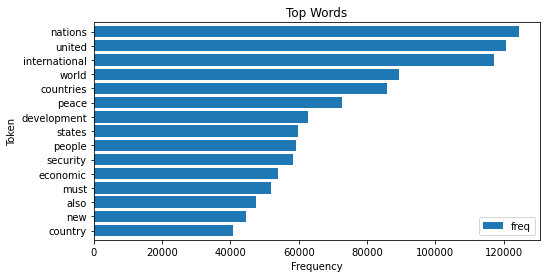

In [44]:
ax = freq_df.head(15).plot(kind='barh', width=0.8, figsize=(8,4))
ax.invert_yaxis()
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')

# 11. Word Clouds

In [45]:
!pip install wordcloud

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = df.query("year==2015 and country=='USA'")['text'].values[0]
text

'Seventy years after the founding of the United Nations it is worth reflecting on what the members of this body, working together, have helped to achieve. Out of the ashes of the Second World War, having witnessed the unthinkable power of the atomic age, the United States has worked with many nations in the Assembly to prevent a third world war — by forging alliances with old adversaries; by supporting the steady emergence of strong democracies accountable to their people and not to any foreign Power; and by building an international system that imposes a cost on those who choose conflict over cooperation, an order that recognizes the dignity and equal worth of all people.\nThat has been the work of seven decades. That is the ideal that this body has, at its best, pursued. Of course, there have been too many times when, collectively, we have fallen short of those ideals. Over the seven decades, terrible conflicts have claimed untold victims. But we have pressed forward, slowly, steadil

(-0.5, 399.5, 199.5, -0.5)

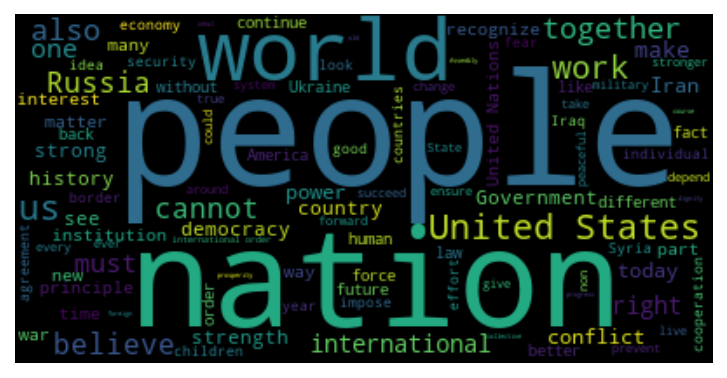

In [48]:
wc = WordCloud(max_words=100, stopwords=stopwords)
wc.generate(text)
plt.figure(dpi=150)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')

## Word Cloud framework

In [49]:
#เป็นการเขียนขึ้นมาและนับเอง
def wordcloud(word_freq, title=None, max_words=200, stopwords=None):
    #สร้าง worldcloud ก่อน
    wc = WordCloud(width=800, height=400, 
                   background_color= "black", colormap="Paired", 
                   max_font_size=150, max_words=max_words)
    
    # convert data frame into dict
    if type(word_freq) == pd.Series:
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = word_freq

    # filter stop words in frequency counter
    if stopwords is not None:
        counter = {token:freq for (token, freq) in counter.items() 
                              if token not in stopwords}
    wc.generate_from_frequencies(counter)
 
    plt.title(title) 

    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")

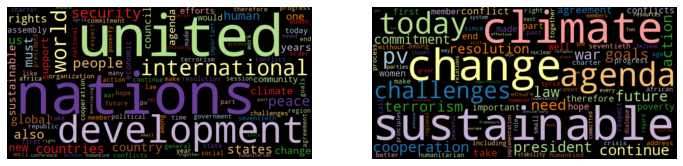

In [50]:
freq_2015_df = count_words(df[df['year']==2015])
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)###
wordcloud(freq_2015_df['freq'], max_words=100)
plt.subplot(1,2,2)###
wordcloud(freq_2015_df['freq'], max_words=100, stopwords=freq_df.head(50).index)
#plt.tight_layout()###


# 12. Finding a Keyword-in-Context

In [61]:
!pip install textacy

  Using cached textacy-0.11.0-py3-none-any.whl (200 kB)
  Using cached cachetools-4.2.2-py3-none-any.whl (11 kB)
  Using cached pyphen-0.11.0-py3-none-any.whl (2.0 MB)
  Using cached catalogue-2.0.6-py3-none-any.whl (17 kB)
  Using cached typer-0.3.2-py3-none-any.whl (21 kB)
  Using cached wasabi-0.8.2-py3-none-any.whl (23 kB)
  Using cached pathy-0.6.0-py3-none-any.whl (42 kB)
  Using cached spacy_legacy-3.0.8-py2.py3-none-any.whl (14 kB)
  Using cached smart_open-5.2.1-py3-none-any.whl (58 kB)
  Using cached click-7.1.2-py2.py3-none-any.whl (82 kB)
  Attempting uninstall: click
    Found existing installation: click 8.0.1
    Uninstalling click-8.0.1:
      Successfully uninstalled click-8.0.1


In [51]:
from textacy.extract.kwic import keyword_in_context
import random

def kwic(doc_series, keyword, window=35, print_samples=5):
    
    def add_kwic(text):
        kwic_list.extend(keyword_in_context(text, keyword, ignore_case=True, window_width=window))
    
    kwic_list = []
    doc_series.map(add_kwic)
    
    if print_samples is None or print_samples==0:
        return kwic_list
    else:
        k = min(print_samples, len(kwic_list))
        print(f"{k} random samples out of {len(kwic_list)} " + \
              f"contexts for '{keyword}':")
        for sample in random.sample(list(kwic_list), k):
            print(re.sub(r'[\n\t]', ' ', sample[0]) + '  ' + \
                  sample[1]+'  ' +\
                  re.sub(r'[\n\t]',' ', sample[2]))

In [52]:
kwic(df[df['year']==2015]['text'], 'sdgs', print_samples=5)

5 random samples out of 73 contexts for 'sdgs':
a necessarily ambitious vision and   SDGs  . We have no doubt of the complexit
the Sustainable Development Goals (  SDGs  ). That was brilliant. However, all
ited Nations requirement. With the   SDGs  , we have the opportunity to improv
ill vivid in our memories. The new   SDGs   framework must ensure that account
the Sustainable Development Goals (  SDGs  ) will require countries, both deve


# 13. N-gram

In [53]:
def ngrams(tokens, n=2, sep=' '):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])]

In [54]:
text = "the visible manifestation of the global climate change"
tokens = tokenize(text)
print("|".join(ngrams(tokens,2)))

the visible|visible manifestation|manifestation of|of the|the global|global climate|climate change


# 14. N-gram with stopword

In [144]:
def ngrams(tokens, n=2, sep=' ', stopwords=stopwords):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])
           if len([t for t in ngram if t in stopwords])==0]

In [56]:
tokens

['the', 'visible', 'manifestation', 'of', 'the', 'global', 'climate', 'change']

In [57]:
text = "the visible manifestation of the global climate change"
tokens = tokenize(text)
print("|".join(ngrams(tokens,2, stopwords=stopwords)))

visible manifestation|global climate|climate change


# 15. Comparing frequencies across time intervals and categories

In [58]:
def count_keywords(tokens, keywords):
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

In [59]:
keywords = ['nuclear','terrorism','climate','freedom']
tokens = ['nuclear','climate','climate','freedom','climate','freedom']

print(count_keywords(tokens, keywords))

[1, 0, 3, 2]


In [60]:
def count_keywords_by(df, by, keywords, column='tokens'):
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by]
    
    return freq_df.groupby(by).sum().sort_values(by)

In [61]:
freq_df = count_keywords_by(df, by='year', keywords=keywords)

In [62]:
freq_df

,nuclear,terrorism,climate,freedom
year,,,,
1970,192,7,18,128
1971,275,9,35,205
1972,393,379,74,280
1973,347,124,79,266
1974,478,24,71,316
1975,578,20,53,232
1976,451,146,57,347
1977,675,75,58,321
1978,550,82,52,309


<AxesSubplot:xlabel='year'>

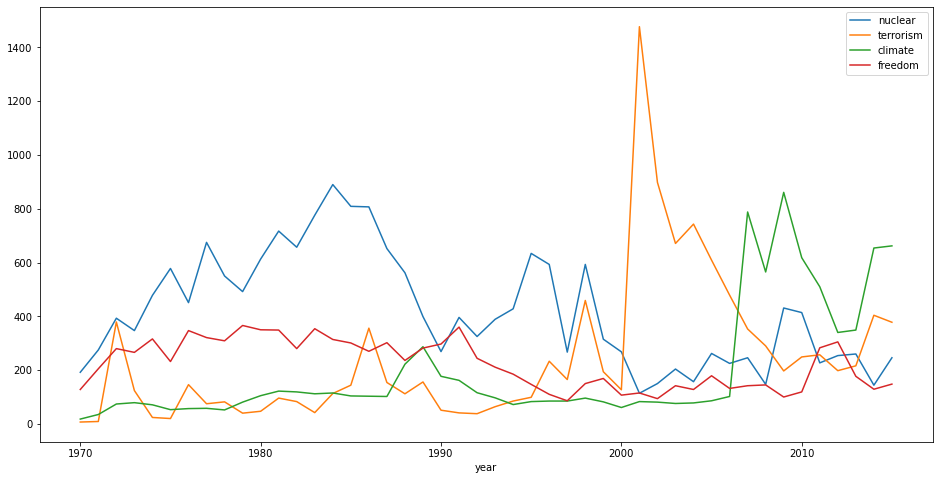

In [63]:
freq_df.plot(kind='line', figsize=(16,8))

---

In [ ]:
##ลองทำแลป

In [142]:
import regex as re

def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

In [154]:
def ngrams(tokens, n=2, sep=' ', stopwords=stopwords):
    return [sep.join(ngram) for ngram in zip(*[tokens[i:] for i in range(n)])
           if len([t for t in ngram if t in stopwords])==0]

In [160]:
text = df.query(" 1970<=year<=1990")['text'].values[0]
tokens = tokenize(text)
#print("|".join(ngrams(tokens,2, stopwords=stopwords)))
tokens = str(ngrams(tokens,2, stopwords=stopwords))
tokens
#tokens

In [133]:
type(tokens)

str

In [155]:
pipeline = [str.lower, tokenize, ngrams ]

def prepare(text, pipeline):
    tokens = text
    for transform in pipeline:
        tokens = transform(tokens)
    return tokens

In [156]:
#prepare(tokens, pipeline)